In [ ]:
#-*- coding: utf-8 -*-
"""
File: bs_2D_properboundary.ipynb
Author: Eddie Kelly
Date: 2024

This file is part of the Quantum algorithm for linear systems of equations for the multi-dimensional Black-Scholes equations project which was completed as part 
of the thesis https://mural.maynoothuniversity.ie/id/eprint/19288/.

License: MIT License
"""

import sys 
sys.path.append('../')
sys.path.append('../../')

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps
from scipy.sparse import csc_matrix
from IPython.display import display, Markdown
import bs_differential_op as bs_op
import bs_2dim_helper as bs_2dim 
from Matrices import matrixmod as mm
from lognormal import lognormal_nD_stock, normal_2D_stock

# Consider the Black Scholes equation in two dimensions:
$$
\frac{\partial V}{\partial t}+\frac{1}{2}\sigma^{2}S_{1}^{2}\frac{\partial^{2}V}{\partial S_{1}^{2}}+\frac{1}{2}\sigma^{2}S^{2}\frac{\partial^{2}V}{\partial S_{2}^{2}}+\rho \sigma_{1}\sigma_{2}\frac{\partial V}{\partial S_{1} \partial S_{2}}
+rS_{1}\frac{\partial V}{\partial S_{1}}+rS_{2}\frac{\partial V}{\partial S_{2}} -rV = 0
$$


Consider also the boundary and initial conditions for the European exchange option:
<br>
<br>

**Initial conditions**
<br>
<br>

$$
V(T,S_{1},S_{2})  = \max(S_{1}-S_{2},0)
$$

<br>

**Near side boundary conditions**
<br>
<br>

$$
V(t,0,S_{2}) = 0 \quad \forall t
$$

$$
V(t,S_{1},0) = \max(S_{1},0) \quad \forall t
$$

<br>

**Far side boundary conditions:**
<br>
<br>

$$
V(t,(S_{1})_{upper},S_{2}) = \max((S_{1})_{upper}-S_{2},0) \quad \forall t
$$

$$
V(t,S_{1},(S_{2})_{upper}) = \max(S_{1}-(S_{2})_{upper},0) \quad \forall t
$$

<br>

Where the variables $T$ corresponds to maturity, $r$ for interest rate, $\sigma_{1}, \sigma_{2}$ for volatilities
of the two assets, $S_{1}, S_{2}$ for the spot prices of the two assets,$(S_{1})_{upper}, (S_{2})_{upper}$ for the
far side boundary values for assets $S_{1},S_{2}$,and $V$ for the value of the option.

---


*First Substitution*

---

Taking the following variables changes: 
$$
x_{1} = \ln(S_{1}) \quad x_{2} = \ln(S_{2}) \quad \tau = T-t
$$
The boundary and initial conditions for the Black-Scholes equation can be transformed using the new variables as follows:

1. **Initial condition:**

The initial condition for an European exchange option is given by:

$$
V(T,S_{1},S_{2})  = max(S_{1}-S_{2},0)
$$

Using the above variable changes, the initial condition becomes:

$$
V(\tau = 0, x_{1},x_{2}) = max(e^{x_{1}}-e^{{x_{2}}}, 0)
$$

**Boundary conditions - Near side**

The boundary conditions are given by:

$$
V(t,0,S_{2}) = 0 \quad \forall \quad t \qquad V(t,S_{1},0) = \max(S_{1},0) \quad \forall \quad \tau
$$

<br>

Using the variable changes $x_{i} = \ln(S_{i})$ and $\tau = T - t$, the boundary conditions become:

<br>

$$
V(\tau,(x_{1})_{lower},x_{2}) = 0 \quad \forall t \qquad V(\tau,S_{1},((x_{2})_{lower})) = \max(e^{x_{1}},0) \quad \forall \tau
$$

**Boundary conditions - Far side**

The boundary conditions are given by:

$$
V(t,(S_{1})_{upper},S_{2}) = \max((S_{1})_{upper}-S_{2},0) \quad \forall t \qquad V(t,S_{1},(S_{2})_{upper}) =
\max(S_{1}-(S_{2})_{upper},0) \quad \forall  t
$$

<br>

Using the variable changes $x_{i} = \ln(S_{i})$ and $\tau = T - t$, the boundary conditions become:

<br>

$$
V(\tau,(x_{1})_{upper},x_{2}) = \max(e^{(x_{1})_{upper}}-e^{x_{2}},0) \quad \forall \tau \qquad V(\tau,x_{1},(x_{2})_{upper}) = \max(e^{x_{1}}-e^{(x_{2})_{upper}},0) \quad \forall  \tau
$$



The new Black Scholes differential equation is :
$$
\frac{\partial V}{\partial\tau} = \frac{1}{2}\sigma_{1}^{2}\frac{\partial^{2}V}{\partial x_{1}^{2}}
+ \frac{1}{2}\sigma_{2}^{2}\frac{\partial^{2}V}{\partial x_{2}^{2}}
+ \rho\sigma_{1}\sigma_{2}\frac{\partial^{2}V}{\partial x_{1}\partial x_{2}}
+\left(r-\frac{\sigma_{1}^{2}}{2}\right)\frac{\partial V}{\partial x_{1}}
+\left(r-\frac{\sigma_{2}^{2}}{2}\right)\frac{\partial V}{\partial x_{2}}
-rV
$$
---

*Second Substituition*

---

Finally for the final substitution $W = e^{r\tau}V$ , we get the final form of the boundary/initial conditions:
If you switch to the variable $W = e^{r\tau}V$, the boundary and initial conditions for the Black-Scholes equation can be transformed as follows:

1. **Initial condition:**

The initial condition for an European exchange option is given by:

$$
V(\tau=0, x_{1},x_{2}) = \max(e^{x_{1}}-e^{x_{2}},0)
$$

Using the variable change $W = e^{r\tau}V$, the initial condition becomes:

$$
W(\tau=0, x_{1},x_{2}) =  \max(e^{x_{1}}-e^{x_{2}}, 0)
$$

2. **Boundary conditions - Near side conditions**

The boundary conditions are given by:

<br>

$$
V(\tau,(x_{1})_{lower},x_{2}) = 0 \quad \forall \tau \qquad V(\tau,x_{1},((x_{2})_{lower})) = \max(e^{x_{1}},0) \quad \forall \tau
$$

<br>

Using the variable change $W = e^{r\tau}V$, the boundary conditions become:

<br>

$$
W(\tau, (x_{1})_{lower},x_{2}) = 0 \quad \forall \tau \qquad W(\tau,x_{1},(x_{2})_{lower}) = \max(e^{r\tau + x_{1}},0) \quad \forall \tau 
$$

<br>

2. **Boundary conditions - Far side conditions**

The boundary conditions are given by:

<br>

$$
V(\tau,(x_{1})_{upper},x_{2}) = \max(e^{(x_{1})_{upper}}-e^{x_{2}},0) \quad \forall t \qquad V(\tau,x_{1},(x_{2})_{upper}) = \max(e^{x_{1}}-e^{(x_{2})_{upper}},0) \quad \forall  \tau
$$


<br>

Using the variable change $W = e^{r\tau}V$, the boundary conditions become:

<br>

$$
W(\tau, (x_{1})_{upper},x_{2}) = \max(e^{r\tau+(x_{1})_{upper}}-e^{r\tau+x_{2}},0) \quad \forall \tau \qquad W(\tau,x_{1},(x_{2})_{upper}) = \max(e^{r\tau + x_{1}}-e^{r\tau + (x_{2})_{upper}},0) \quad \forall \tau 
$$

<br>

The new Black Scholes differential equation is :
$$
\frac{\partial W}{\partial\tau} = \frac{1}{2}\sigma_{1}^{2}\frac{\partial^{2}W}{\partial x_{1}^{2}}
+ \frac{1}{2}\sigma_{2}^{2}\frac{\partial^{2}W}{\partial x_{2}^{2}}
+ \rho\sigma_{1}\sigma_{2}\frac{\partial^{2}V}{\partial x_{1}\partial x_{2}}
+\left(r-\frac{\sigma_{1}^{2}}{2}\right)\frac{\partial W}{\partial x_{1}}
+\left(r-\frac{\sigma_{2}^{2}}{2}\right)\frac{\partial W}{\partial x_{2}}
$$

---


In [54]:
##Define the params
S_1 = 170
S_2 = 90
r = 0 #For marghrabe pricing interest rate is zero
vol_1 = 0.3
vol_2 = 0.4
rho = 0.9
cov_matrix = np.array([[vol_1**2,rho*vol_1*vol_2],[rho*vol_1*vol_2,vol_2**2]])
T_0 = 1
T_1 = 1

Total_life_option = T_1 + T_0


x1_n_grid = 30                                       # Just changed number gridpoints from 30->15
x2_n_grid = 30
x1_n_grid_internal = x1_n_grid - 2
x2_n_grid_internal = x2_n_grid - 2

Total_grid_no= x1_n_grid*x2_n_grid
x1_lower = -8
x1_upper = 8
x2_lower = -8
x2_upper =  8
asset_num = 2 

spatial_step = (x1_upper-x1_lower)/(x1_n_grid -1) # We are using the same spatial step for both x1 and x2

Num_block = 2
Size_block = 3
temporal_step = T_0/Num_block


##Define the grid
grid = np.linspace(x1_lower+spatial_step,x1_upper-spatial_step,x1_n_grid_internal) # We are using the same spatial step for both x1 and x2


In [55]:
print('_'.join([str(var) for var in [S_1, S_2,r,vol_1,vol_2,rho,T_0,T_1,Total_life_option, x1_n_grid, x1_lower, x1_upper, np.round(spatial_step,2), Num_block, Size_block, np.round(temporal_step,2)]]))

170_90_0_0.3_0.4_0.9_1_1_2_30_-8_8_0.55_2_3_0.5


In [56]:
# Arbitrary values for the parameters in Black Scholes equation


markdown_string =f'''

| Parameter | Values |
|--------|-------------|
|  $S_{1}$  |   {S_1}    |
|  $S_{2}$  |   {S_2}    |
|  $r$  |  {r}    |
|  $\sigma_{{1}}$  |   {vol_1}   |
|  $\sigma_{{2}}$  |   {vol_2}   |
|  $T_0$  |   {T_0}   |
| $(x_{1})_{{lower}}$ | {x1_lower} | 
| $(x_{1})_{{upper}}$ | {x1_upper} |
| $(x_{2})_{{lower}}$ | {x2_lower} |
| $(x_{2})_{{lower}}$ | {x2_upper} |
| $N_{{x1gridpoints}}$| {x1_n_grid} |
| $N_{{x2gridpoints}}$| {x2_n_grid} |
| $N_{{gridpoints}}$| {Total_grid_no} |
| $Spatial Step$ | {np.round(spatial_step,3)} |
| $Temporal Step$ | {np.round(temporal_step,3)} |

As we are dealing with discretized system we have to place upper and lower limits on the simulation zone. 
Lower and upper $x$ values that range from {x1_lower} to {x1_upper} corresponds to stock prices of $e^{{{x1_lower}}} 
\sim {np.format_float_scientific(np.exp(x1_lower),precision=2)} $ and
$e^{{{x1_upper}}} \sim {np.format_float_scientific(np.exp(x1_upper),precision=2)}$ respectively.
For the given values of  $S_{1} = {S_1}, S_{2} = {S_2}$ , the lower and upper limits are sufficient.

---
'''

display(Markdown(markdown_string))



| Parameter | Values |
|--------|-------------|
|  $S_1$  |   170    |
|  $S_2$  |   90    |
|  $r$  |  0    |
|  $\sigma_{1}$  |   0.3   |
|  $\sigma_{2}$  |   0.4   |
|  $T_0$  |   1   |
| $(x_1)_{lower}$ | -8 | 
| $(x_1)_{upper}$ | 8 |
| $(x_2)_{lower}$ | -8 |
| $(x_2)_{lower}$ | 8 |
| $N_{x1gridpoints}$| 30 |
| $N_{x2gridpoints}$| 30 |
| $N_{gridpoints}$| 900 |
| $Spatial Step$ | 0.552 |
| $Temporal Step$ | 0.5 |

As we are dealing with discretized system we have to place upper and lower limits on the simulation zone. 
Lower and upper $x$ values that range from -8 to 8 corresponds to stock prices of $e^{-8} 
\sim 3.35e-04 $ and
$e^{8} \sim 2.98e+03$ respectively.
For the given values of  $S_1 = 170, S_2 = 90$ , the lower and upper limits are sufficient.

---


Consider the transformed Black Scholes equation again:
$$
\frac{\partial W}{\partial\tau} = \frac{1}{2}\sigma_{1}^{2}\frac{\partial^{2}W}{\partial x_{1}^{2}}
+ \frac{1}{2}\sigma_{2}^{2}\frac{\partial^{2}W}{\partial x_{2}^{2}}
+ \rho\sigma_{1}\sigma_{2}\frac{\partial^{2}V}{\partial x_{1}\partial x_{2}}
+\left(r-\frac{\sigma_{1}^{2}}{2}\right)\frac{\partial W}{\partial x_{1}}
+\left(r-\frac{\sigma_{2}^{2}}{2}\right)\frac{\partial W}{\partial x_{2}}
$$
The  _modified_ boundary conditions are given by : 
$$
\vec{B}(\tau) = \frac{\sigma_{1}^{2}}{2}\vec{\tilde{B}}_{\partial^{2}x_{1}}(\tau) +\frac{\sigma_{2}^{2}}{2}\vec{\tilde{B}}_{\partial^{2}x_{2}}(\tau) 
+ \rho \sigma_{1}\sigma_{2}\vec{B}_{(\partial x_{1}\partial x_{2})}(\tau) 
+\left(r-\frac{\sigma_{1}^{2}}{2}\right)\vec{B}_{(\partial x_{1})}(\tau) + \left(r-\frac{\sigma_{2}^{2}}{2}\right)\vec{B}_{(\partial x_{2})}(\tau)
$$

---


The 'subcomponent' of the modified boundary conditions are given by :

---

$$
\begin{equation}
    (\vec{B}_{(\partial x_{a})}(\tau))_{l} = \frac{1}{2h}\sum_{j_{1},j_{2},..,j_{d}}\Bigl[-\delta_{\substack{l,\mathcal{N}(j_{d},.,1,.,j_{1})\\ 
    \hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}L_{x_{a}}
    (\tau,j_{d},.,\widehat{j_{a}},.,j_{1})\\ +\delta_{\substack{l,\mathcal{N}(j_{d},.,N-
    1,.,j_{1})\\ \hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}
    U_{x_{a}}(\tau,j_{d},.,\widehat{j_{a}}.,j_{1})\Bigr]
\end{equation}
$$

$$
\begin{align}
    (\vec{\tilde{B}}_{(\partial^{2} x_{a})}(\tau))_{l} = 
    \frac{1}{4h^{2}} \sum_{j_{1},j_{2},..,j_{d}}\Bigl[
    &-\delta_{\substack{l,\mathcal{N}(j_{d},.,1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}2h\partial_{x_{a}}L_{x_{a}}(\tau,j_{d},..,\widehat{j_{a}},..,j_{1})
    +\delta_{\substack{l,\mathcal{N}(j_{d},.,2,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}L_{x_{a}}(\tau,j_{d},..,\widehat{j_{a}},..,j_{d})\\
    &+\delta_{\substack{l,\mathcal{N}(j_{d},.,N-2,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}U_{x_{a}}(t,j_{d},..,\widehat{j_{a}},..,j_{1})
    +\delta_{\substack{l,\mathcal{N}(j_{d},.,N-1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}2h\partial_{x_{a}}U_{x_{a}}(\tau,j_{d},..,\widehat{j_{a}},..,j_{1})\Bigr]\\    
\end{align}
$$

$$
\begin{align}
    (\vec{B}_{(\partial x_{a},\partial x_{b})}(\tau))_{l} = 
    \frac{1}{4h^{2}} \sum_{j_{1},j_{2},..,j_{d}}\Bigl[
    &-\delta_{\substack{l,\mathcal{N}(j_{d},.,1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}L_{x_{a}}(\tau,j_{d},..,\widehat{j_{a}},..,j_{1})
    -\delta_{\substack{l,\mathcal{N}(j_{d},.,1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} b^{th}}}L_{x_{b}}(\tau,j_{d},..,\widehat{j_{b}},..,j_{d})\\
    &+\delta_{\substack{l,\mathcal{N}(j_{d},.,N-1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} a^{th}}}U_{x_{a}}(\tau,j_{d},..,\widehat{j_{a}},..,j_{1})
    +\delta_{\substack{l,\mathcal{N}(j_{d},.,N-1,.,j_{1})\\\hspace{0.5cm} \uparrow\\ \hspace{0.5cm} b^{th}}}U_{x_{b}}(\tau,j_{d},..,\widehat{j_{b}},..,j_{1})\Bigr]\\    
\end{align}
$$

---

These above boundary conditions further reduce in the two dimensional case to the simpler representation:

---

$$
\left(\vec{B}_{(\partial x_{1})}(\tau)\right)_{l} = \frac{1}{2h}\sum_{j_{2}}\left[-\delta_{l,\mathcal{N}(j_{2},1)}L_{x_{1}}(\tau,j_{2})+\delta_{l,\mathcal{N}(j_{2},N-1)}U_{x_{1}}(\tau,j_{2}) \right]
$$

$$
\left(\vec{B}_{(\partial x_{2})}(\tau)\right)_{l} = \frac{1}{2h}\sum_{j_{1}}\left[-\delta_{l,\mathcal{N}(1,j_{1})}L_{x_{2}}(\tau,j_{2})+\delta_{l,\mathcal{N}(N-1,j_{1})}U_{x_{2}}(\tau,j_{1}) \right]
$$


$$
\begin{align}
    \left(\vec{\tilde{B}}_{(\partial^{2} x_{1})}(\tau)\right)_{l} = \frac{1}{4h^{2}}\sum_{j_{2}}\Bigl[-\delta_{l,\mathcal{N}(j_{2},1)}2h\partial_{x_{1}}L_{x_{1}}(\tau,j_{2})+\delta_{l,\mathcal{N}(j_{2},2)}L_{x_{1}}(\tau,j_{2}) 
    + \delta_{l,\mathcal{N}(j_{2},N-2)}U_{x_{1}}(\tau,j_{2}) + \delta_{l,\mathcal{N}(j_{2},N-1)}2h\partial_{x_{1}}U_{x_{1}}(\tau,j_{2}) \Bigr]
\end{align}    
$$

$$
\begin{align}
    \left(\vec{\tilde{B}}_{(\partial^{2} x_{2})}(\tau)\right)_{l} = \frac{1}{4h^{2}}\sum_{j_{1}}\Bigl[-\delta_{l,\mathcal{N}(1,j_{1})}2h\partial_{x_{2}}L_{x_{2}}(\tau,j_{1})+\delta_{l,\mathcal{N}(2,j_{1})}L_{x_{2}}(\tau,j_{1}) 
    + \delta_{l,\mathcal{N}(N-2,j_{1})}U_{x_{2}}(\tau,j_{1}) + \delta_{l,\mathcal{N}(N-1,j_{1})}2h\partial_{x_{2}}U_{x_{2}}(\tau,j_{1}) \Bigr]
\end{align}    
$$

$$

\left(\vec{B}_{(\partial x_{1},\partial x_{2})}(\tau)\right)_{l} = \frac{1}{4h^{2}}\sum_{j_{2},j_{1}}\left[-\delta_{l,\mathcal{N}(j_{2},1)}L_{x_{1}}(\tau,j_{2})-\delta_{l,\mathcal{N}(1,j_{1})}L_{x_{2}}(\tau,j_{2})+\delta_{l,\mathcal{N}(j_{2},N-1)}U_{x_{1}}(\tau,j_{2})+\delta_{l,\mathcal{N}(N-1,j_{1})}U_{x_{2}}(\tau,j_{1}) \right]
$$

---

For the current case, the explicit boundary conditions are given by :

---

$$
\begin{align}
    L_{x_{1}}(\tau,j_{2}) &= 0  &\forall j_{2},\tau \\
    
    U_{x_{1}}(\tau,j_{2}) &= e^{r\tau}\max(e^{(x_{1})_{upper}}-e^{x_{2}(j_{2})},0)  &\forall j_{2}, \tau \\

    L_{x_{2}}(\tau,j_{1}) &= e^{r\tau}\max(e^{x_{1}(j_{1})},0)  &\forall j_{1},\tau \\

    U_{x_{2}}(\tau,j_{1}) &= e^{r\tau}\max(e^{x_{1}(j_{1})}-e^{(x_{2})_{upper}},0)  &\forall j_{1},\tau \\
\end{align}    
$$

$$
\begin{align}
    \partial_{x_{1}}L_{x_{1}}(\tau,j_{2}) &= 0 &\forall j_{2},\tau \\
    
    \partial_{x_{1}}U_{x_{1}}(\tau,j_{2}) &= \left(\frac{e^{(x_{1})_{upper}+r\tau}}{e^{(x_{1})_{upper}}-e^{x_{2}(j_{2})}}\right)\max(e^{(x_{1})_{upper}}-e^{x_{2}(j_{2})},0) &\forall j_{2}, \tau \\

    \partial_{x_{2}}L_{x_{2}}(\tau,j_{1}) &= 0 &\forall j_{1},\tau \\

    \partial_{x_{2}}U_{x_{2}}(\tau,j_{1}) &= \left(\frac{e^{(x_{2})_{upper}+r\tau}}{e^{(x_{2})_{upper}}-e^{x_{1}(j_{1})}}\right)\max(e^{x_{1}(j_{1})}-e^{(x_{2})_{upper}},0) &\forall j_{1},\tau \\
\end{align}    
$$



---

Where we define the following functions that goes from the indices $j_{1},j_{2}$ to the corresponding values of $x_{1},x_{2}$:

---

$$
x_{1}(j_{1}) = \left(\frac{(x_1)_{upper}-(x_1)_{lower}}{N-2}\right)(j_{1}-1)+(x_{1})_{lower}
$$

$$
x_{2}(j_{2}) = \left(\frac{(x_2)_{upper}-(x_2)_{lower}}{N-2}\right)(j_{2}-1)+(x_{2})_{lower}
$$



In [57]:
def convert_to_x1(j1) :
    if j1 < 1 or j1 > x1_n_grid_internal:

        raise ValueError("j1 has to be between 1 and x1_n_grid_internal")
    
    return spatial_step*j1 + x1_lower

def convert_to_x2(j2) :
    if j2 < 1 or j2 > x2_n_grid_internal:

        raise ValueError("j2 has to be between 1 and x2_n_grid_internal")
    
    return spatial_step*j2 + x2_lower

# These boundary functions are specific to European exchange option #

def Lx_1(tau,j2) :
    return 0

def Ux_1(tau,j2) :
    return max(np.exp(r*tau +x1_upper)-np.exp(r*tau + convert_to_x2(j2)),0) # making sure exact same function definiton betweem std a
                                                                            # prop.
def Lx_2(tau,j1) :
    return max(np.exp(r*tau + convert_to_x1(j1)),0)

def Ux_2(tau,j1) :
    return max(np.exp(r*tau + convert_to_x1(j1))-np.exp(r*tau + x2_lower),0)


def partial_Lx_1(tau,j2) :
    return 0

def partial_Ux_1(tau,j2) :
    return ((np.exp(x1_upper+r*tau))/(np.exp(x1_upper)-np.exp(convert_to_x2(j2))))*max(np.exp(x1_upper)-np.exp(convert_to_x2(j2)),0)

def partial_Lx_2(tau,j1) :
    return 0

def partial_Ux_2(tau,j1) :
    return ((np.exp(x2_upper+r*tau))/(np.exp(x2_upper)-np.exp(convert_to_x1(j1))))*max(np.exp(convert_to_x1(j1))-np.exp(x2_upper),0)


In [58]:
## \vec{B}_{(\partial^{2} x_{2})} ##

def B_x1_x1(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j2 in range(1,x2_n_grid_internal+1):
            if mm.index_function(x2_n_grid,2,(j2,1)) == l:
                vec[l-1] = (1/(spatial_step**2))*Lx_1(tau,j2)

            elif mm.index_function(x2_n_grid,2,(j2,x2_n_grid-2)) == l:  ##Eddie I think there is an an error here with (j2,1) and (1,j1) distinction.
                vec[l-1] = (1/(spatial_step**2))*Ux_1(tau,j2)

            else:
                break 
    return vec

## \vec{B}_{(\partial^{2} x_{2})} ##

def B_x2_x2(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j1 in range(1,x1_n_grid_internal+1):
            if mm.index_function(x1_n_grid,2,(1,j1)) == l:
                vec[l-1] = (1/(spatial_step**2))*Lx_2(tau,j1)

            elif mm.index_function(x1_n_grid,2,(x2_n_grid-2,j1)) == l:
                vec[l-1] = (1/(spatial_step**2))*Ux_2(tau,j1)

            else:
                break 
    return vec    


## \vec{\tilde{B}}_{(\partial^{2} x_{1})} ##

def tilde_B_x1_x1(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j2 in range(1,x2_n_grid_internal+1):
            if   mm.index_function(x2_n_grid,asset_num,(j2,1)) == l:
                vec[l-1] = -(1/(4*spatial_step**2))*(2*spatial_step)*partial_Lx_1(tau,j2)
                
            elif mm.index_function(x2_n_grid,asset_num,(j2,2)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*Lx_1(tau,j2)

            elif mm.index_function(x2_n_grid,asset_num,(j2,x2_n_grid-3)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*Ux_1(tau,j2)   

            elif mm.index_function(x2_n_grid,asset_num,(j2,x2_n_grid-2)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*(2*spatial_step)*partial_Ux_1(tau,j2)
                
            else:
                break 
    return vec

## \vec{\tilde{B}}_{(\partial^{2} x_{2})} ##

def tilde_B_x2_x2(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j1 in range(1,x1_n_grid_internal+1):
            if   mm.index_function(x1_n_grid,asset_num,(1,j1)) == l:
                vec[l-1] = -(1/(4*spatial_step**2))*(2*spatial_step)*partial_Lx_2(tau,j1)

            elif mm.index_function(x1_n_grid,asset_num,(2,j1)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*Lx_2(tau,j1)

            elif mm.index_function(x1_n_grid,asset_num,(x1_n_grid-3,j1)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*Ux_2(tau,j1)

            elif mm.index_function(x1_n_grid,asset_num,(x1_n_grid-2,j1)) == l:
                vec[l-1] = (1/(4*spatial_step**2))*(2*spatial_step)*partial_Ux_2(tau,j1)
            else:
                break 
    return vec        

def B_x1_x2(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j1 in range(1,x1_n_grid_internal+1):
            for j2 in range(1,x2_n_grid_internal+1):
                if mm.index_function(x2_n_grid,2,(j2,1)) == l:
                    vec[l-1] = -(1/(4*spatial_step**2))*Lx_1(tau,j2)
                
                elif mm.index_function(x1_n_grid,2,(1,j1)) == l:	
                    vec[l-1] = -(1/(4*spatial_step**2))*Lx_2(tau,j1)
                
                elif mm.index_function(x2_n_grid,2,(j2,x2_n_grid-2)) == l:
                    vec[l-1] = (1/(4*spatial_step**2))*Ux_1(tau,j2)

                elif mm.index_function(x1_n_grid,2,(x1_n_grid-2,j1)) == l:
                    vec[l-1] = (1/(4*spatial_step**2))*Ux_2(tau,j1)  

                else:
                    break
    return vec

## \vec{B}_{(\partial x_{1})} ##

def B_x1(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j2 in range(1,x2_n_grid_internal+1):
            if mm.index_function(x2_n_grid,2,(j2,1)) == l:
                vec[l-1] = -(1/(2*spatial_step))*Lx_1(tau,j2)

            elif mm.index_function(x2_n_grid,2,(j2,x2_n_grid-2)) == l:
                vec[l-1] = (1/(2*spatial_step))*Ux_1(tau,j2)

            else:
                break 
    return vec

## \vec{B}_{(\partial x_{2})} ##

def B_x2(tau):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for l in range(1,(x1_n_grid_internal)*(x2_n_grid_internal) + 1):
        for j1 in range(1,x1_n_grid_internal+1):
            if mm.index_function(x1_n_grid,2,(1,j1)) == l:
                vec[l-1] = -(1/(2*spatial_step))*Lx_2(tau,j1)

            elif mm.index_function(x1_n_grid,2,(x2_n_grid-2,j1)) == l:
                vec[l-1] = (1/(2*spatial_step))*Ux_2(tau,j1)
                
            else:
                break 
    return vec    

def B_total_mod(tau):
        vec = ((vol_1**2)/2)*tilde_B_x1_x1(tau)
        vec += ((vol_2**2)/2)*tilde_B_x2_x2(tau)
        vec += rho*vol_1*vol_2*B_x1_x2(tau)
        vec += (r-((vol_1**2)/2))*B_x1(tau)
        vec += (r-((vol_2**2)/2))*B_x2(tau)
        return vec

def B_total_std(tau):
        vec = ((vol_1**2)/2)*B_x1_x1(tau)
        vec += ((vol_2**2)/2)*B_x2_x2(tau)
        vec += rho*vol_1*vol_2*B_x1_x2(tau)
        vec += (r-((vol_1**2)/2))*B_x1(tau)
        vec += (r-((vol_2**2)/2))*B_x2(tau)
        return vec

We now need to define the $\operatorname{boundary.initial.vector}$ . To produce this vector we need the $V$ array where the first row encodes the initial position and the other rows encode the various orders of the  Taylor expansion of  the boundary terms $\vec{B}(t)$ 

In [59]:
#--Initial Condition--#


initial_position = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
for j2 in range(1,x2_n_grid_internal+1):
    for j1 in range(1,x1_n_grid_internal+1):
        initial_position[int(mm.index_function(x1_n_grid,2,(j2,j1)))-1] = max((np.exp(convert_to_x1(j1)) - np.exp(convert_to_x2(j2))),0)


#---Boundary Conditions---#

# Take just V_0, V_1, V_2, and V_3, I use the
# forward first and second differences to 
# calculate the taylor terms.

#--Modified Boundary Conditions--#

eps=0.1

V_0_mod = initial_position

V_1_mod = B_total_mod(0) 

V_2_mod = (B_total_mod(0+eps)-B_total_mod(0))/eps

V_3_mod = (B_total_mod(0+2*eps)-2*B_total_mod(0+eps)+B_total_mod(0))/(eps**2)

V_mod = np.zeros((Size_block + 1,(x1_n_grid_internal)*(x2_n_grid_internal)))

V_mod[0,:] = V_0_mod
V_mod[1,:] = V_1_mod
V_mod[2,:] = temporal_step*V_2_mod
# V_mod[3,:] = ((temporal_step**2)/2)*V_3_mod
# V_mod[4,:] = V_0_mod*0


#--Standard Boundary Conditions--#

eps=0.1

V_0_std = initial_position

V_1_std = B_total_std(0) 

V_2_std = (B_total_std(0+eps)-B_total_std(0))/eps

V_3_std = (B_total_std(0+2*eps)-2*B_total_std(0+eps)+B_total_std(0))/(eps**2)

V_std = np.zeros((Size_block+1,(x1_n_grid_internal)*(x2_n_grid_internal)))

V_std[0,:] = V_0_std
V_std[1,:] = V_1_std
V_std[2,:] = temporal_step*V_2_std
# V_std[3,:] = ((temporal_step**2)/2)*V_3_std
# V_std[4,:] = V_0_std*0

In [60]:
#--Defintion and inversion of improper differential operator with modified boundary conditions--#

diff_op_improp = bs_op.black_scholes_nD_improp(x1_n_grid_internal,spatial_step,r,cov_matrix,2)
bound_init_vec_mod = mm.bound_init_vec(Num_block,Size_block,V_mod)

# Print shapes for gut check
# print(bound_init_vec_mod.shape)
# print(mm.matrix_ode_tens(Num_block,Size_block,diff_op_improp,temporal_step).shape)

improp_matrix_csr = sps.csr_matrix(mm.matrix_ode_tens(Num_block,Size_block,diff_op_improp,temporal_step))
full_sol_improp = sps.linalg.spsolve_triangular(improp_matrix_csr,bound_init_vec_mod)
acc_sol_improp = mm.extractor(Num_block,Size_block,diff_op_improp,full_sol_improp)

In [61]:
#--Definiton and inversion of proper differential operator with standard boundary conditions--#

diff_op_prop = bs_op.black_scholes_nD_prop(x1_n_grid_internal,spatial_step,r,cov_matrix,2)
bound_init_vec_std = mm.bound_init_vec(Num_block,Size_block,V_std)

# Print shapes for gut check
# print(bound_init_vec_std.shape)
# print(mm.matrix_ode_tens(Num_block,Size_block,diff_op_prop,temporal_step).shape)

prop_matrix_csr = sps.csr_matrix(mm.matrix_ode_tens(Num_block,Size_block,diff_op_prop,temporal_step))
full_sol_prop = sps.linalg.spsolve_triangular(prop_matrix_csr,bound_init_vec_std)
acc_sol_prop = mm.extractor(Num_block,Size_block,diff_op_prop,full_sol_prop)

In [62]:
# Alternate solver if triangular not available #
# full_sol_improp = np.linalg.solve(mm.matrix_ode_tens(Num_block,Size_block,diff_op_improp,temporal_step),bound_init_vec_mod)
# full_sol_prop = np.linalg.solve(mm.matrix_ode_tens(Num_block,Size_block,diff_op_prop,temporal_step),bound_init_vec_std)

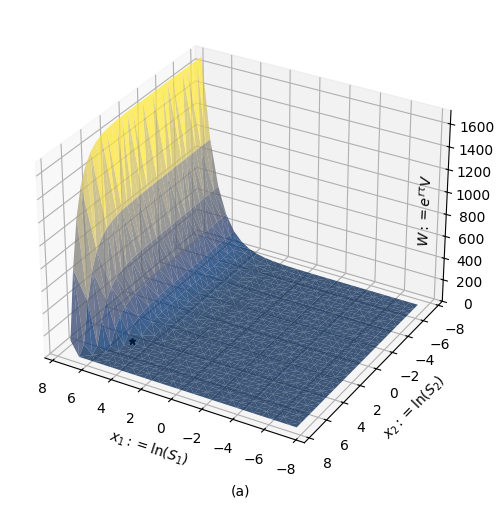

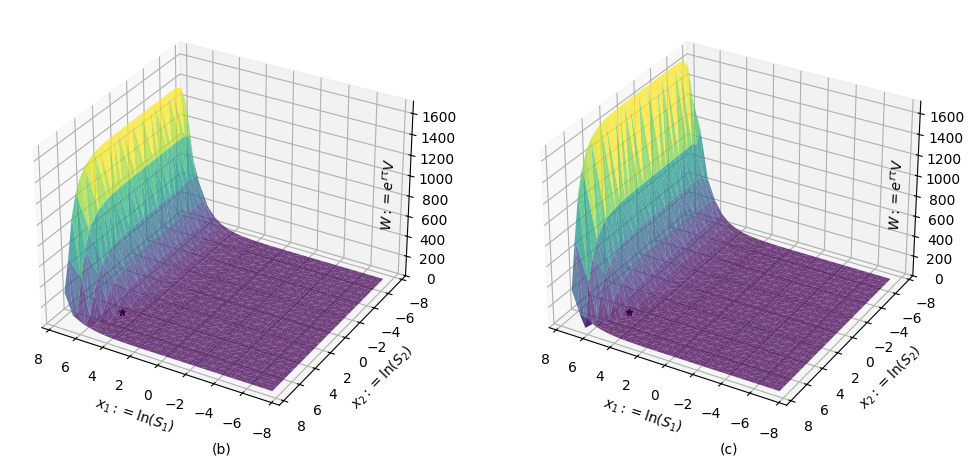

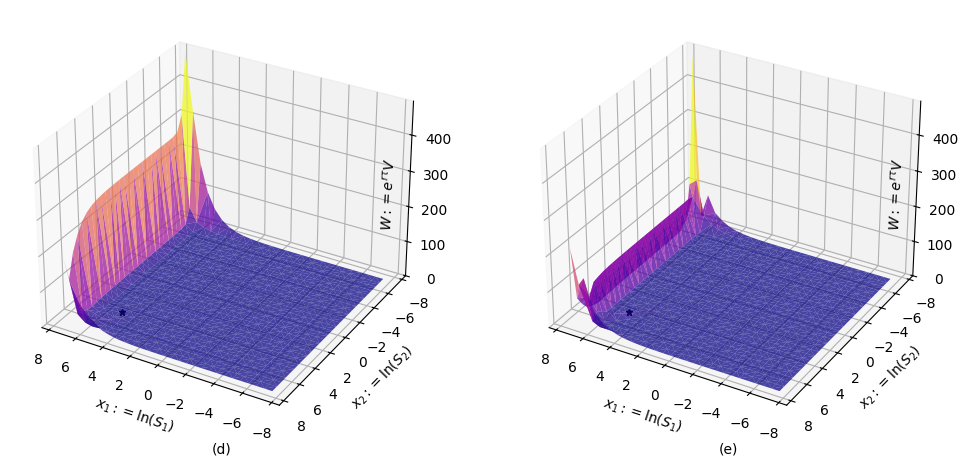

In [63]:
improp_x1_list = []
improp_x2_list = []
improp_W_list  = []

for j2 in range(1,x2_n_grid_internal+1):
    for j1 in range(1,x1_n_grid_internal+1):
        improp_x1_list.append(convert_to_x1(j1))
        improp_x2_list.append(convert_to_x2(j2))
        improp_W_list.append(acc_sol_improp[mm.index_function(x1_n_grid,2,(j2,j1))-1])

prop_x1_list = []
prop_x2_list = []
prop_W_list  =  []

for j2 in range(1,x2_n_grid_internal+1):
    for j1 in range(1,x1_n_grid_internal+1):
        prop_x1_list.append(convert_to_x1(j1))
        prop_x2_list.append(convert_to_x2(j2))
        prop_W_list.append(acc_sol_prop[mm.index_function(x1_n_grid,2,(j2,j1))-1])

exact_x1_list = []
exact_x2_list = []
exact_W_list = []

for j2 in range(1,x2_n_grid_internal+1):
    for j1 in range(1,x1_n_grid_internal+1):
        exact_x1_list.append(convert_to_x1(j1))
        exact_x2_list.append(convert_to_x2(j2))
        exact_W_list.append(bs_2dim.maghrabe_pricing(np.exp(convert_to_x1(j1)),np.exp(convert_to_x2(j2)),vol_1,vol_2,rho,T_0))


zlim = max(max(improp_W_list),max(prop_W_list),max(exact_W_list))

fig0 = plt.figure(figsize=(8, 6))
fig1 = plt.figure(figsize=(12, 6))
fig2 = plt.figure(figsize=(12, 6))

ax1 = fig1.add_subplot(121, projection='3d')
ax1.plot_trisurf(prop_x1_list, prop_x2_list, prop_W_list, cmap='viridis',alpha = 0.75)
ax1.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black')
ax1.view_init(azim=120,elev=30)
ax1.set_zlim([0,zlim])
ax1.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax1.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax1.set_zlabel(r'$W := e^{r\tau}V$',labelpad=-30)
ax1.text2D(0.5, -0.05, '(b)', transform=ax1.transAxes, ha='center')
# ax1.set_title('Numerical simulation of proper differential operator')

ax2 = fig0.add_subplot(111, projection='3d')
ax2.plot_trisurf(exact_x1_list, exact_x2_list, exact_W_list,cmap='cividis',alpha=0.75)
ax2.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black')
ax2.view_init(azim=120,elev=30)
ax2.set_zlim([0,zlim])
ax2.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax2.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax2.set_zlabel(r'$W := e^{r\tau}V$',labelpad=-30)
ax2.text2D(0.5, -0.05, '(a)', transform=ax2.transAxes, ha='center')
# ax2.set_title('Exact analytic solution from Marghrabe pricing formula')

ax3 = fig1.add_subplot(122, projection='3d')
ax3.plot_trisurf(improp_x1_list, improp_x2_list, improp_W_list,cmap='viridis',alpha = 0.75)
ax3.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black',label='Asset prices')
ax3.view_init(azim=120,elev=30)
ax3.set_zlim([0,zlim])
ax3.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax3.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax3.set_zlabel(r'$W := e^{r\tau}V$',labelpad=-30)
ax3.text2D(0.5, -0.05, '(c)', transform=ax3.transAxes, ha='center')
# ax3.set_title('Numerical simulation of improper differential operator')

zlim_error = max(max(np.abs(np.array(exact_W_list)-np.array(improp_W_list))),max(np.abs(np.array(exact_W_list)-np.array(prop_W_list))))

ax4 = fig2.add_subplot(122, projection='3d')
ax4.plot_trisurf(exact_x1_list, exact_x2_list, np.abs(np.array(exact_W_list)-np.array(improp_W_list)),cmap='plasma',alpha = 0.75)
ax4.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black')
ax4.view_init(azim=120, elev=30)
ax4.set_zlim([0,zlim_error])
ax4.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax4.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax4.set_zlabel(r'$W := e^{r\tau}V$',labelpad=-30)
ax4.text2D(0.5, -0.05, '(e)', transform=ax4.transAxes, ha='center')
# ax4.set_title('Difference between the improper and exact solution')

ax5 = fig2.add_subplot(121, projection='3d')
ax5.plot_trisurf(exact_x1_list, exact_x2_list, np.abs(np.array(exact_W_list)-np.array(prop_W_list)),cmap='plasma',alpha = 0.75)
ax5.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black')
ax5.view_init(azim=120, elev=30)
ax5.set_zlim([0,zlim_error])
ax5.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax5.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax5.set_zlabel(r'$W := e^{r\tau}V$',labelpad=-30)
ax5.text2D(0.5, -0.05, '(d)', transform=ax5.transAxes, ha='center')
# ax5.set_title('Difference between the proper and exact solution')


plt.show()


## Definition of lognormal/normal distribution

Thus far we have simulated the solution for a time $T_{0}$. We now produce the distribution lognormal
parameter with corresponding parameter $T_{1}$. By taking the appropiately discounted price of the 
inner product of these two quantities, we should be able to recover the value of the option.

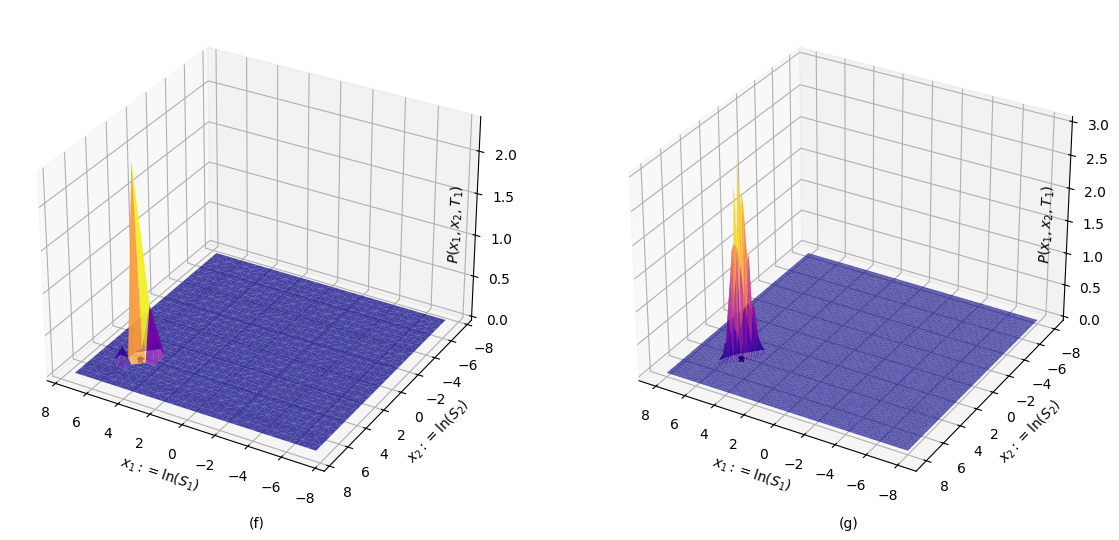

In [64]:
fig = plt.figure(figsize=(14, 9))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')        

pdf_grid_x1=[]
pdf_grid_x2=[]
pdf_grid=[]

for j2 in range(1,x2_n_grid_internal+1):
    for j1 in range(1,x1_n_grid_internal+1):
        pdf_grid_x1.append(convert_to_x1(j1))
        pdf_grid_x2.append(convert_to_x2(j2))
        pdf_grid.append(normal_2D_stock((convert_to_x1(j1),convert_to_x2(j2)),(np.log(S_1),np.log(S_2)),r,cov_matrix,T_1))

ax1.plot_trisurf(pdf_grid_x1, pdf_grid_x2, pdf_grid,cmap='plasma',alpha = 0.75)
ax1.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black',label='Asset prices')
ax1.set_xlabel(r'$x_{1} := \ln(S_{1})$')
ax1.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax1.set_zlabel(r'$P(x_{1},x_{2},T_{1})$',labelpad=-30)
ax1.text2D(0.5, -0.05, '(f)', transform=ax1.transAxes, ha='center')
# ax1.set_title("Conditional probability distribution of the \n stock prices at time T_1 defined discretely")
ax1.view_init(azim=120,elev=30)

pdf_cont_x1=[]
pdf_cont_x2=[]
pdf_cont=[]

for x2 in np.linspace(x2_lower,x2_upper,100):
    for x1 in np.linspace(x1_lower,x1_upper,100):
        pdf_cont_x1.append(x1)
        pdf_cont_x2.append(x2)
        pdf_cont.append(normal_2D_stock((x1,x2),(np.log(S_1),np.log(S_2)),r,cov_matrix,T_1))

ax2.plot_trisurf(pdf_cont_x1, pdf_cont_x2, pdf_cont,cmap='plasma',alpha = 0.75)
ax2.plot(np.log(S_1),np.log(S_2),marker='*',markersize=5, color='black',label='Asset prices')
ax2.set_xlabel(r'$x_{1} := \ln(S_{1})$')



ax2.set_ylabel(r'$x_{2} := \ln(S_{2})$')
ax2.set_zlabel(r'$P(x_{1},x_{2},T_{1})$',labelpad=-30)
ax2.text2D(0.5, -0.05, '(g)', transform=ax2.transAxes, ha='center')
# ax2.set_title("Conditional probability distribution of the \n stock prices at time T_1 defined continuously")
ax2.view_init(azim=120,elev=30)      

In [65]:
#---Creation of the probability vector---#
def norm_vec_2D(S_1,S_2,r,cov,T_1):
    vec = np.zeros((x1_n_grid_internal)*(x2_n_grid_internal))
    for j2 in range(1,x2_n_grid_internal+1):
        for j1 in range(1,x1_n_grid_internal+1):
            vec[int(mm.index_function(x1_n_grid,2,(j2,j1))-1)] = normal_2D_stock(
                (convert_to_x1(j1),convert_to_x2(j2)),(np.log(S_1),np.log(S_2)),r,cov,T_1)*spatial_step**2
    return vec

probvec = norm_vec_2D(S_1,S_2,r,cov_matrix,T_1)

print(np.sum(probvec))


# Ensure the norm is one if not, forcefully normalize (May happen due to spacing etc)
probvec_norm = probvec/np.sum(probvec)


1.0516416993269668


In [66]:
x111 = np.round(np.log(S_1),3)
x222 = np.round(np.log(S_2),3)

first_list = [(j1,convert_to_x1(j1),np.exp(convert_to_x1(j1))) for j1 in range(1,x1_n_grid_internal+1)]
second_list =  [(j2,convert_to_x2(j2),np.exp(convert_to_x2(j2))) for j2 in range(1,x2_n_grid_internal+1)]

first_list_diff = [np.abs(convert_to_x1(j1)-np.log(S_1)) for j1 in range(1,x1_n_grid_internal+1)]
second_list_diff = [np.abs(convert_to_x2(j2)-np.log(S_2)) for j2 in range(1,x2_n_grid_internal+1)]

j1 = first_list_diff.index(np.min(first_list_diff)) + 1
j2 = second_list_diff.index(np.min(second_list_diff)) + 1

index = mm.index_function(x1_n_grid,2,(j2,j1))-1

markdown_string = f"""
# Extracting the value of the European exchange option via PDE solution at the time $T_{0}$ = {T_0}.
---
For the spot price of $S_{{1}} = {S_1}$ and $S_{{2}} = {S_2}$, we need to extract the value of solution at
$$ 
x_{2},x_{1} = (\ln({S_2}),\ln({S_1})) \sim ({x222},{x111}) 
$$.
This roughly corresponds to the ${index}$ th component of the solution vector.

As $V =e^{{-r\\tau}}W$ and the fact that the variables $r = {r}$ and $T_0 = {T_0}$ , we need to multiply the result by 
$$ 
e^{{-r \\tau}} \Rightarrow e^{{-{r*T_0}}} 
$$
Hence, the value of the option should be 
$$
\\text{{Value of option}} \sim e^{{-{r*T_0}}}W({index}) \sim {np.exp(-r*T_0)}*W({index})
$$
"""

display(Markdown(markdown_string))


# Extracting the value of the European exchange option via PDE solution at the time $T_0$ = 1.
---
For the spot price of $S_{1} = 170$ and $S_{2} = 90$, we need to extract the value of solution at
$$ 
x_2,x_1 = (\ln(90),\ln(170)) \sim (4.5,5.136) 
$$.
This roughly corresponds to the $639$ th component of the solution vector.

As $V =e^{-r\tau}W$ and the fact that the variables $r = 0$ and $T_0 = 1$ , we need to multiply the result by 
$$ 
e^{-r \tau} \Rightarrow e^{-0} 
$$
Hence, the value of the option should be 
$$
\text{Value of option} \sim e^{-0}W(639) \sim 1.0*W(639)
$$


In [67]:
print("--------------------------------------------\n|The gridpoints, x_i values, S_i = exp(x_i)|\n--------------------------------------------\n")

print("Grid point along x1 axis = %f th, corresponding x1 at gridpoint = %f, value of S1 = %f" %(j1,convert_to_x1(j1),np.exp(convert_to_x1(j1))))
print("Grid point along x2 axis = %f th, corresponding x2 at gridpoint = %f, value of S2 = %f \n" %(j2,convert_to_x2(j2),np.exp(convert_to_x2(j2))))
##For the solutions we are just using T_0 not total time of option lifetime.
print("--------------------------------------------------\n|The values of the options as solved by up to T_0|\n--------------------------------------------------\n")
print("Proper numerical treatment  = ",acc_sol_prop[mm.index_function(x1_n_grid,2,(j2,j1))-1])
print("Improper numerical treament = ",acc_sol_improp[mm.index_function(x1_n_grid,2,(j2,j1))-1])
print("Analytic value              = ",bs_2dim.maghrabe_pricing(S_1,S_2,vol_1,vol_2,rho,T_0))


--------------------------------------------
|The gridpoints, x_i values, S_i = exp(x_i)|
--------------------------------------------

Grid point along x1 axis = 24.000000 th, corresponding x1 at gridpoint = 5.241379, value of S1 = 188.930517
Grid point along x2 axis = 23.000000 th, corresponding x2 at gridpoint = 4.689655, value of S2 = 108.815651 

--------------------------------------------------
|The values of the options as solved by up to T_0|
--------------------------------------------------

Proper numerical treatment  =  76.81511594415507
Improper numerical treament =  83.85293618864786
Analytic value              =  80.0016249082519


## Estimating option value at time $T_{0}+T_{1}$ through inner product of probability vector and option value encoded vector

In [68]:
value_to_hit = bs_2dim.maghrabe_pricing(S_1,S_2,vol_1,vol_2,rho,Total_life_option)
print("-----------------------------------------------\n|The value of the option at total time T_0+T_1|\n-----------------------------------------------\n")
print("Proper differential op. with std. b.c.s along with unnormalized probvec   = %f" %(np.exp(-r*Total_life_option)*np.dot(probvec,acc_sol_prop)))
print("Improper differential op. with mod. b.c.s along with unnormalized probvec = %f" %(np.exp(-r*Total_life_option)*np.dot(probvec,acc_sol_improp)))
print("Proper differential op. with std. b.c.s along with normalized probvec     = %f" %(np.exp(-r*Total_life_option)*np.dot(probvec_norm,acc_sol_prop)))
print("Improper differential op. with mod. b.c.s along with normalized probvec   = %f" %(np.exp(-r*Total_life_option)*np.dot(probvec_norm,acc_sol_improp)))
print("----                                                                      ----")
print("Analytic value                                                            = %f"%(value_to_hit))

-----------------------------------------------
|The value of the option at total time T_0+T_1|
-----------------------------------------------

Proper differential op. with std. b.c.s along with unnormalized probvec   = 78.492430
Improper differential op. with mod. b.c.s along with unnormalized probvec = 84.972820
Proper differential op. with std. b.c.s along with normalized probvec     = 74.637997
Improper differential op. with mod. b.c.s along with normalized probvec   = 80.800162
----                                                                      ----
Analytic value                                                            = 80.077445
